<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/answer/11a_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第11章 モデル推定

## 課題

scikit-learnのdiabetesデータに対して様々なクラスタリング手法を適用してみてください。diabetesデータは回帰用のデータ（事例数442）で、target値は 25-346 で値が高くなるほど悪化の可能性が高いことを示しています。生成したクラスタ間で、target値の平均に違いが生じているかどうかで評価を行ってください。他のクラスタと比較してtarget値の平均が突出して高くなるようなクラスタ（一定数以上の要素数をもつことが条件）を見つけることができれば成功です。


ライブラリの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.mixture import GaussianMixture

データの読み込み

In [2]:
(X, t) = load_diabetes(return_X_y=True)

主成分分析を用いてデータをプロットします。はっきりしたクラスタが見えないので、それほど簡単な問題ではないことがわかります。

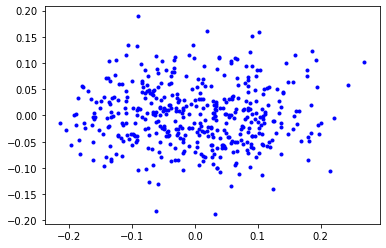

In [3]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
plt.plot(X2[:,0], X2[:,1],"b.")

ターゲット値の統計値

In [4]:
print("ave: %5.2f   std: %5.2f" % (np.average(t), np.std(t)))

ave: 152.13   std: 77.01


### 階層的クラスタリング

[AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)を用いて階層的クラスタリングを行います。クラスタ数を変化させて結果を観察してください。

In [5]:
ac=AgglomerativeClustering(n_clusters=5)
ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

クラスタ毎の事例数とtarget値の平均を表示します。

In [6]:
y = ac.labels_
for c in set(y):
    num = np.count_nonzero(y==c)
    ave = np.average(t[y==c])
    print("Cluster %d: num %3d, ave %5.2f" % (c, num, ave))

Cluster 0: num 118, ave 170.15
Cluster 1: num  84, ave 173.36
Cluster 2: num  98, ave 102.03
Cluster 3: num  83, ave 196.77
Cluster 4: num  59, ave 106.31


### k-meansクラスタリング

[KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)を用いて分割最適化クラスタリングを行います。クラスタ数は予め与えておく必要があります。

In [7]:
km = KMeans(n_clusters = 3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

クラスタ毎の事例数とtarget値の平均を表示します。

In [8]:
y = km.labels_
for c in set(y):
    num = np.count_nonzero(y==c)
    ave = np.average(t[y==c])
    print("Cluster %d: num %3d, ave %5.2f" % (c, num, ave))

Cluster 0: num 124, ave 197.23
Cluster 1: num 161, ave 108.45
Cluster 2: num 157, ave 161.31


 [AffinityPropagation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)はすべてのノード間で「類似度」と「クラスタ中心になりやすさ」の情報を交換しながらクラスタリングを行う手法です。クラスタ数（すなわちクラスタ中心の数）を事前に決める必要はありません。

 パラメータpreferenceは各データの中心としての選ばれやすさを表すので、負の値を設定すれば、その絶対値に応じてクラスタ数が少なくなります。

In [9]:
ap=AffinityPropagation(preference=-0.3)
ap.fit(X)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=-0.3, verbose=False)

クラスタ毎の事例数とtarget値の平均を表示します。

In [10]:
y = ap.labels_
for c in set(y):
    num = np.count_nonzero(y==c)
    ave = np.average(t[y==c])
    print("Cluster %d: num %3d, ave %5.2f" % (c, num, ave))

Cluster 0: num  85, ave 193.99
Cluster 1: num  67, ave 182.13
Cluster 2: num  62, ave 109.24
Cluster 3: num  70, ave 105.86
Cluster 4: num  89, ave 118.99
Cluster 5: num  69, ave 199.68


### 確率密度推定

[GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)では、EMアルゴリズムを用いて混合分布によるクラスタリングを行います。クラスタ数を指定する必要があります。これまでのクラスと少しメソッドが異なるので注意してください。

In [11]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=1)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=1, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

クラスタ毎の事例数とtarget値の平均を表示します。

In [12]:
y = gmm.predict(X)
for c in set(y):
    num = np.count_nonzero(y==c)
    ave = np.average(t[y==c])
    print("Cluster %d: num %3d, ave %5.2f" % (c, num, ave))

Cluster 0: num  48, ave 232.35
Cluster 1: num 185, ave 145.94
Cluster 2: num 209, ave 139.19


## まとめ

初期値に乱数を用いるアルゴリズムは、実施毎に結果が異なります。GMMの例ではrandom_state=1で、事例数48、平均値232.35のクラスタが発見できていますが、他の値ではかなり異なる結果になります。